In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
print(len(X_train), len(y_test))

60000 10000


In [4]:
# these are no of sample images dataset , from keras

In [5]:
# each img is 28 x 28 pixels

In [6]:
X_train[0].shape

(28, 28)

In [7]:
# each images is a 2d matrix with numbers as color code

In [8]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

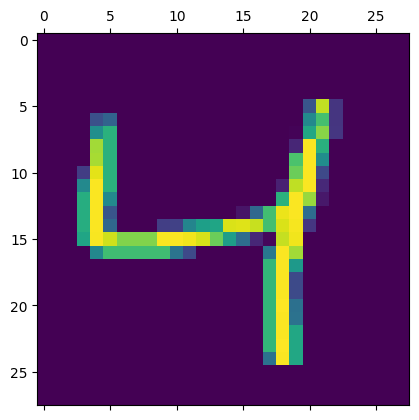

In [9]:
plt.matshow(X_train[2]) # diplay using matplotlib

In [10]:
y_train[2] # what number is there at position 2 - whose img we've displayed above

4

In [11]:
y_train[:5] # first 5 no

array([5, 0, 4, 1, 9], dtype=uint8)

In [12]:
X_train.shape

(60000, 28, 28)

In [13]:
X_train = X_train/255 
X_test = X_test/255

# this is called scaling - each element now has value between zero and one
# this improves accuracy

In [14]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_train_flattened.shape
# reshape converts the 2d array to 1d array



(60000, 784)

In [15]:
X_test_flattened = X_test.reshape(len(X_test),28*28)
X_test_flattened.shape

(10000, 784)

In [16]:
X_train_flattened[0] # 1d array

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [17]:
# now we create simple neural network

In [18]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,), activation = 'sigmoid')
])
# sequential makes stack
#dense means every input connected to every output
# activation function is sigmoid

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5) 

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4676 - accuracy: 0.8771
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3033 - accuracy: 0.9147
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2834 - accuracy: 0.9206
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2734 - accuracy: 0.9235
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2672 - accuracy: 0.9252


In [19]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2671 - accuracy: 0.9265


[0.2671264410018921, 0.9265000224113464]

In [20]:
# accuracy comes to be 92%

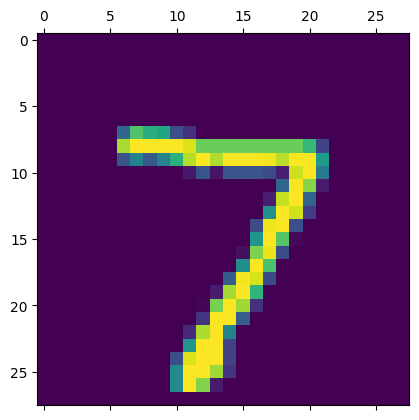

In [21]:
plt.matshow(X_test[0])

In [22]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]
# we are predicting what number is the first image

313/313 [==============================] - 1s 2ms/step


array([2.58074757e-02, 4.06401341e-07, 5.74398674e-02, 9.62132514e-01,
       3.76418326e-03, 1.54876575e-01, 1.74577474e-06, 9.99763668e-01,
       1.15106285e-01, 6.81674361e-01], dtype=float32)

In [23]:
np.argmax(y_predicted[0]) # numpy method to find max value , here ie our prediction 

7

In [24]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5] 
# first 5 predictions

[7, 2, 1, 0, 4]

In [25]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [26]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm
# weve created a confusion matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    0,    2,    0,    5,    6,    2,    2,    0],
       [   0, 1111,    3,    2,    0,    1,    4,    2,   12,    0],
       [   8,    9,  922,   16,    9,    5,   12,   10,   38,    3],
       [   2,    0,   18,  917,    1,   28,    3,    9,   25,    7],
       [   1,    1,    2,    1,  925,    0,   13,    3,   10,   26],
       [   9,    2,    3,   24,   11,  782,   16,    4,   35,    6],
       [  14,    3,    6,    1,    7,   10,  913,    2,    2,    0],
       [   1,    5,   23,    6,    8,    0,    0,  949,    3,   33],
       [   7,    7,    6,   17,    9,   23,    8,   10,  881,    6],
       [  11,    6,    1,   10,   46,    7,    0,   17,    9,  902]])>

Text(95.72222222222221, 0.5, 'Truth')

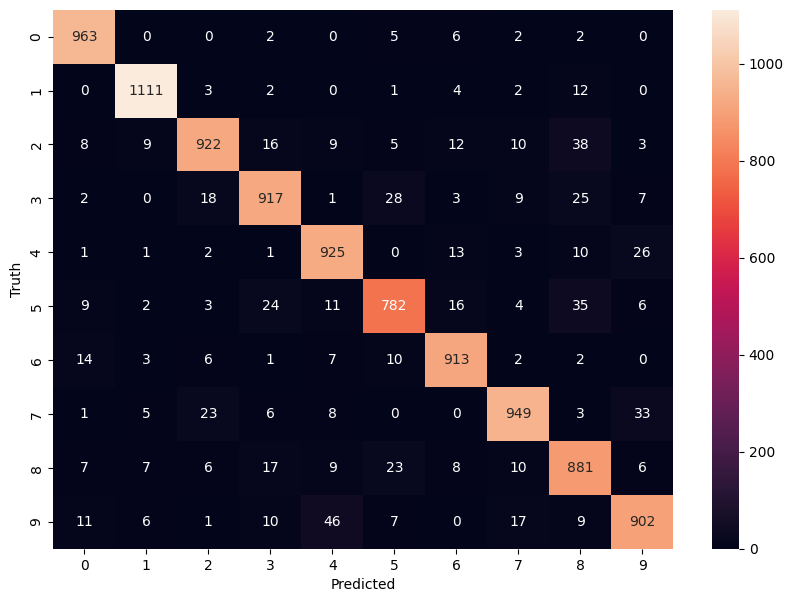

In [27]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel('Truth')

# Confusion matrix allows us to view right and wrong predictions
# anything not in the diagonal is a WRONG prediction
# evaluate performance of the model

In [28]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,), activation = 'relu'), 
    keras.layers.Dense(10, activation = 'sigmoid')
])
# here weve added a new hidden layer with 100 neurons ,activation function relu

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5) 

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2715 - accuracy: 0.9243
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1215 - accuracy: 0.9652
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0848 - accuracy: 0.9753
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0663 - accuracy: 0.9804
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0526 - accuracy: 0.9840


In [29]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0779 - accuracy: 0.9762


[0.0778936892747879, 0.9761999845504761]

In [30]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 1s 2ms/step


array([1.4898232e-04, 3.0196441e-04, 2.6141968e-01, 8.8547164e-01,
       1.2306482e-06, 1.3663691e-02, 6.6987056e-08, 9.9999148e-01,
       3.3180073e-02, 1.3760865e-01], dtype=float32)

In [31]:
np.argmax(y_predicted[0]) # numpy method to find max value , here ie our prediction 

7

In [32]:
# accuracy has improved with addition of hidden layer

313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

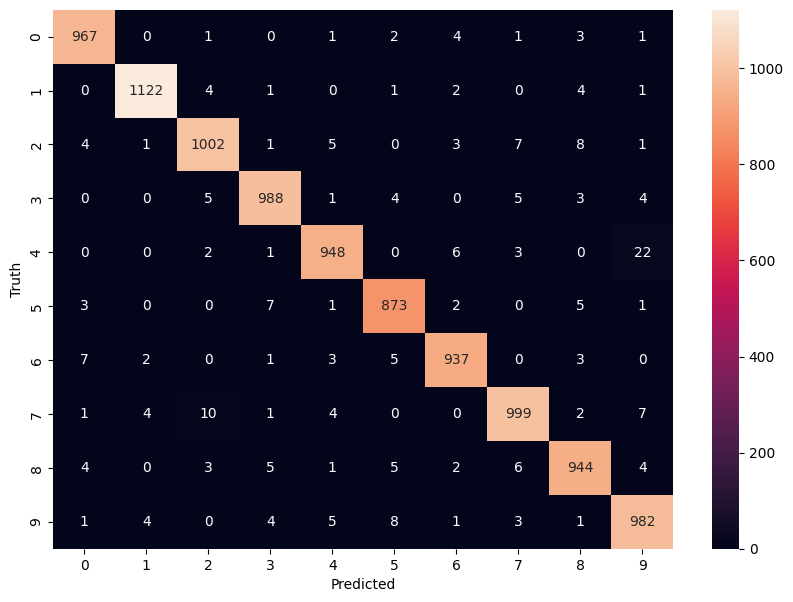

In [33]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel('Truth')


In [34]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation = 'relu'), 
    keras.layers.Dense(10, activation = 'sigmoid')
])
# here weve added a new hidden layer with 100 neurons ,activation function relu

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train , y_train, epochs=5) 

# here we add a function that automatically flattens the X_train array

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2771 - accuracy: 0.9204
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1239 - accuracy: 0.9636
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0861 - accuracy: 0.9741
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0655 - accuracy: 0.9803
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0512 - accuracy: 0.9845
